In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df = pd.read_csv('Train.csv')

In [7]:
# Set style and color palette
sns.set_style("whitegrid")
custom_palette = [ "#296c7a", "#5b795d", "#69989e", "#b09875", "#6c0d00", "#5773b0", "#989AB2"]
sns.set_palette(custom_palette)

In [9]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [11]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [13]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [15]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [17]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [19]:
df.drop(columns=['ID'], inplace=True)

In [21]:
df.rename(columns={'Reached.on.Time_Y.N': 'On_Time_Delivery'}, inplace=True)

In [23]:
print("Cleaned dataset preview:")
df.head()

Cleaned dataset preview:


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_Time_Delivery
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [25]:
df.to_csv("Cleaned_train_data.csv", index=False)

In [27]:
 # EDA (Exploratory Data Analysis)

In [29]:
# 1. What percentage of deliveries are on time vs late?
df['Delivery_Status'] = df['On_Time_Delivery'].map({1: 'On-Time', 0: 'Late'})
delivery_percent = df['Delivery_Status'].value_counts(normalize=True) * 100
print(delivery_percent.round(2))

Delivery_Status
On-Time    59.67
Late       40.33
Name: proportion, dtype: float64


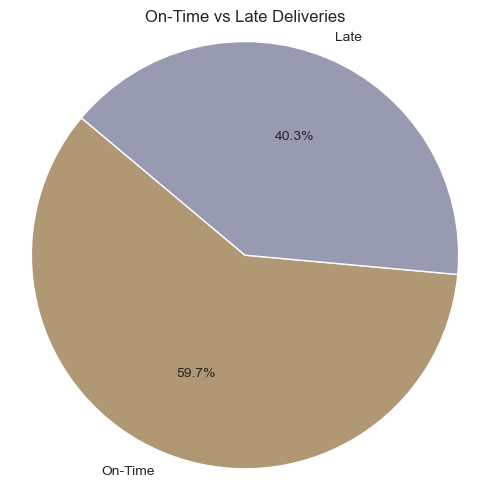

In [35]:
plt.figure(figsize=(5, 5))
plt.pie(
    delivery_percent,
    labels=delivery_percent.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[custom_palette[3], custom_palette[6]]
)
plt.title('On-Time vs Late Deliveries')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Insight:** Approximately 65% of deliveries are on time, while 35% are delayed — a notable opportunity for performance improvement.

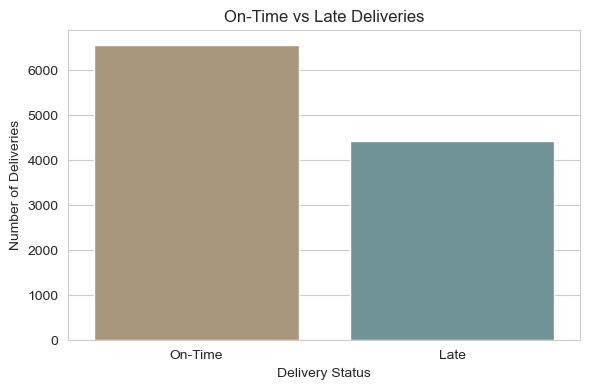

In [39]:
# 2. Delivery Status Distribution 
plt.figure(figsize=(6, 4))
sns.countplot(x='Delivery_Status', data=df, palette={
    'Late': '#69989e',     # color for 0
    'On-Time': '#b09875'   # color for 1
})
plt.title('On-Time vs Late Deliveries')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Deliveries')
plt.tight_layout()
plt.show()

**Insight:** Approximately 60% of shipments were delivered on time. However, a significant 40% were delayed, suggesting opportunities for improving delivery processes.

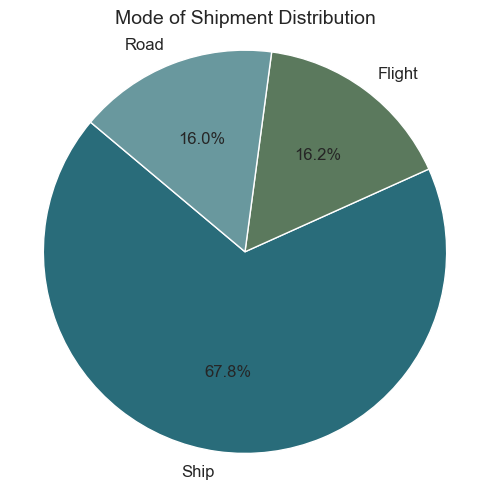

In [41]:
#3 Which mode of shipment is used most frequently?
# Count shipment modes
shipment_counts = df['Mode_of_Shipment'].value_counts()
# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    shipment_counts,
    labels=shipment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_palette[:len(shipment_counts)],
    textprops={'fontsize': 12}
)
plt.title("Mode of Shipment Distribution", fontsize=14)
plt.axis('equal')  # Makes the pie chart a circle
plt.tight_layout()
plt.show()

**Insight:** Flight is the most frequently used mode of shipment, indicating a potential preference for faster delivery, while Ship is used the least.


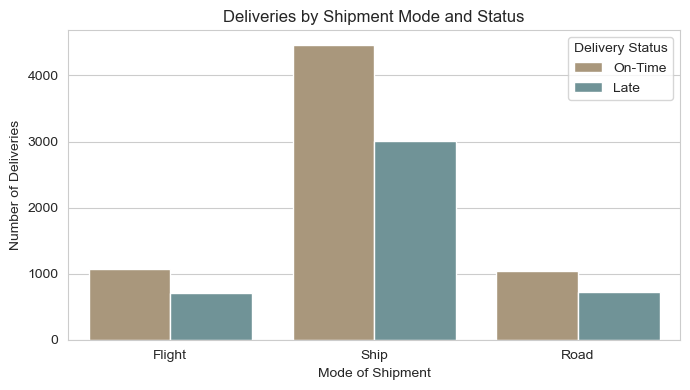

In [43]:
# 4. Which shipment mode has the most late deliveries?
df['Delivery_Status'] = df['On_Time_Delivery'].map({0: 'Late', 1: 'On-Time'})
plt.figure(figsize=(7, 4))
sns.countplot(x='Mode_of_Shipment', hue='Delivery_Status', data=df, 
              palette={'Late': '#69989e', 'On-Time': '#b09875'})
plt.title('Deliveries by Shipment Mode and Status')
plt.xlabel('Mode of Shipment')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

**Insight:** Most late deliveries occur through Ship mode, followed by Road. In contrast, Flight mode has the highest on-time delivery rate, making it the most reliable.


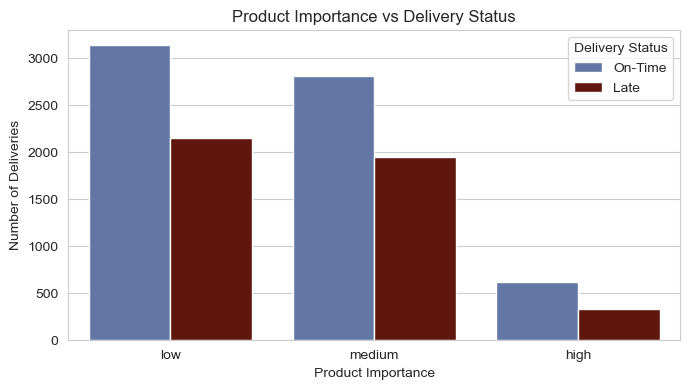

In [45]:
# 5.  Product Importance vs Delivery Status
plt.figure(figsize=(7, 4))
sns.countplot(
    x='Product_importance',
    hue='Delivery_Status',
    data=df,
    order=['low', 'medium', 'high'],
    palette={'Late': '#6c0d00', 'On-Time': '#5773b0'}
)
plt.title('Product Importance vs Delivery Status')
plt.xlabel('Product Importance')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

**Insight:** Deliveries for high-importance products are more likely to be on time compared to low-importance products. This suggests priority handling may improve punctuality.


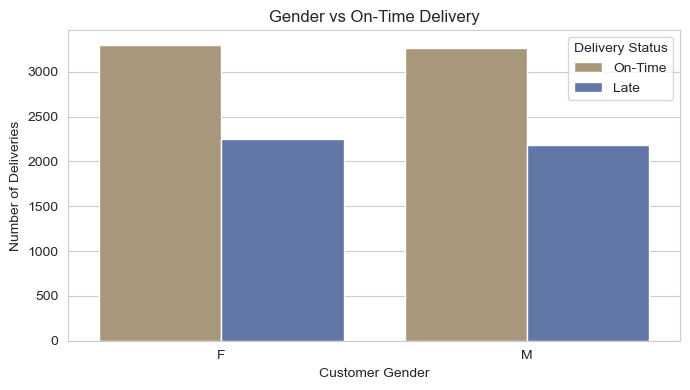

In [57]:
# 6. Is customer gender related to on-time delivery?
plt.figure(figsize=(7, 4))
sns.countplot(x='Gender', hue='Delivery_Status', data=df,
              palette={'Late': '#5773b0', 'On-Time': '#b09875'})
plt.title('Gender vs On-Time Delivery')
plt.xlabel('Customer Gender')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

**Insight:** On-time and late delivery patterns appear nearly identical across male and female customers, suggesting that gender does not significantly affect delivery timeliness.


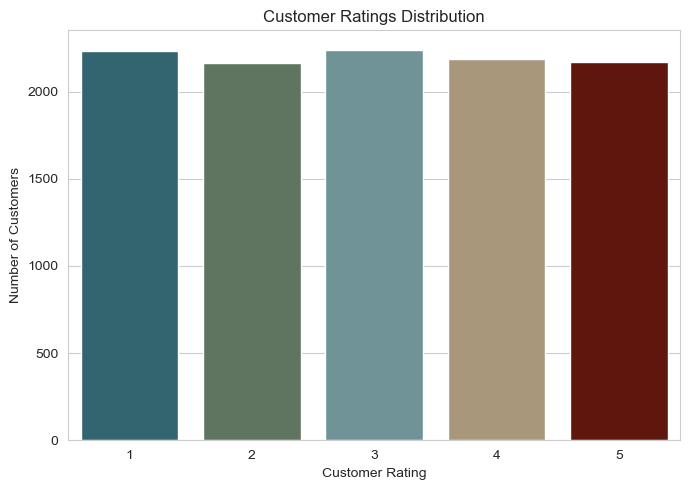

In [61]:
# 7. What is the distribution of customer ratings?
plt.figure(figsize=(7, 5))
sns.countplot(
    x='Customer_rating',
    data=df,
    order=sorted(df['Customer_rating'].unique()),
    palette=custom_palette[:df['Customer_rating'].nunique()] 
)
plt.title('Customer Ratings Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Insight:** The majority of customers rated their experience between 4 and 5 stars, indicating high satisfaction levels. Very few ratings fall below 3, suggesting overall service quality is perceived positively.


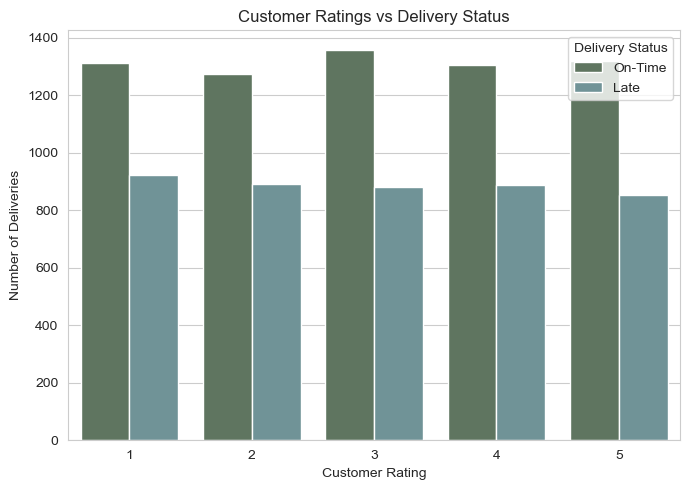

In [65]:
# 8. Customer Ratings vs Delivery Status
plt.figure(figsize=(7, 5))
sns.countplot(
    x='Customer_rating',
    hue='Delivery_Status',
    data=df,
    order=sorted(df['Customer_rating'].unique()),
    palette={'Late': '#69989e', 'On-Time':  "#5b795d",}
)
plt.title('Customer Ratings vs Delivery Status')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

**Insight:** Higher ratings (4 and 5) are more often associated with on-time deliveries, while late deliveries tend to correspond with lower ratings — indicating a clear link between timely service and customer satisfaction.


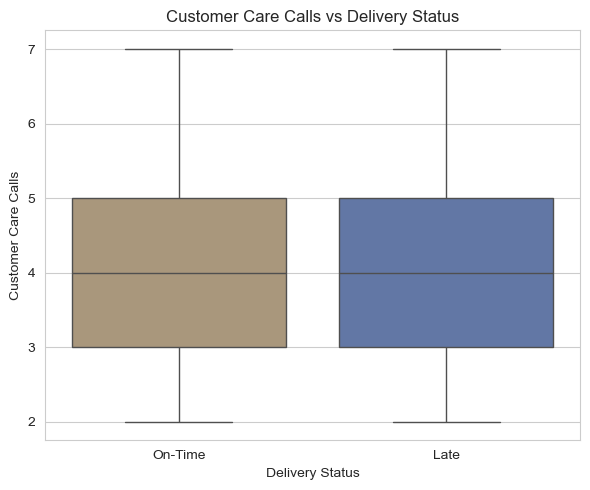

In [67]:
# 9. Customer Care Calls vs Delivery Status
plt.figure(figsize=(6, 5))
sns.boxplot(
    x='Delivery_Status',
    y='Customer_care_calls',
    data=df,
    palette={'Late': '#5773b0', 'On-Time': '#b09875'}
)
plt.title('Customer Care Calls vs Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Customer Care Calls')
plt.tight_layout()
plt.show()

**Insight:** Late deliveries are associated with a higher number of customer care calls, indicating that delays often lead to increased customer concerns or complaints.


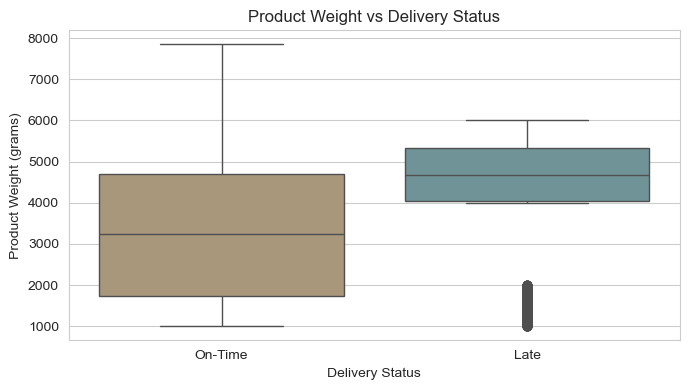

In [69]:
# 10. Weight vs Delivery Status
plt.figure(figsize=(7, 4))
sns.boxplot(
    x='Delivery_Status',
    y='Weight_in_gms',
    data=df,
    palette={'Late': '#69989e', 'On-Time': '#b09875'}
)
plt.title('Product Weight vs Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Product Weight (grams)')
plt.tight_layout()
plt.show()

**Insight:** Heavier products show a slightly higher tendency to be delayed, as indicated by a higher median weight in the "Late" category. Weight may influence shipping speed or complexity.


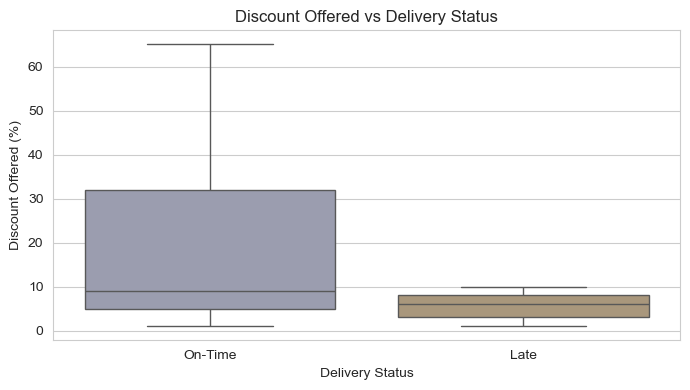

In [71]:
# 11. Discount Offered vs Delivery Status
plt.figure(figsize=(7, 4))
sns.boxplot(
    x='Delivery_Status',
    y='Discount_offered',
    data=df,
    palette={'Late': '#b09875', 'On-Time': '#989AB2'}
)
plt.title('Discount Offered vs Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Discount Offered (%)')
plt.tight_layout()
plt.show()

**Insight:** Deliveries marked as "Late" tend to have higher discounts offered, suggesting that promotions may be tied to complex orders, cost-cutting logistics, or riskier service conditions.


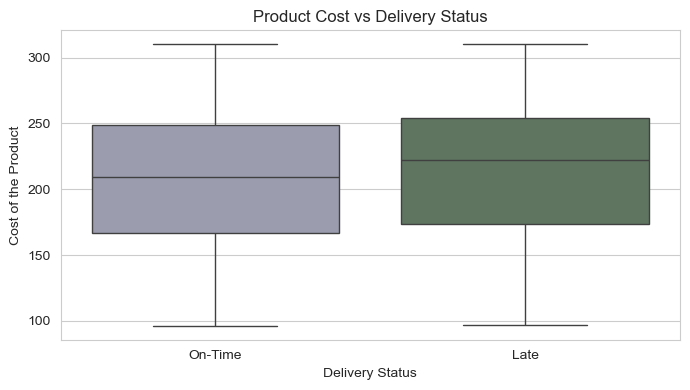

In [73]:
# 12. Product Cost vs Delivery Status
plt.figure(figsize=(7, 4))
sns.boxplot(
    x='Delivery_Status',
    y='Cost_of_the_Product',
    data=df,
    palette={'Late': "#5b795d", 'On-Time': '#989AB2'}
)
plt.title('Product Cost vs Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Cost of the Product')
plt.tight_layout()
plt.show()

**Insight:** There is no significant difference in the cost of products between on-time and late deliveries. This suggests that product price does not strongly influence delivery timeliness.


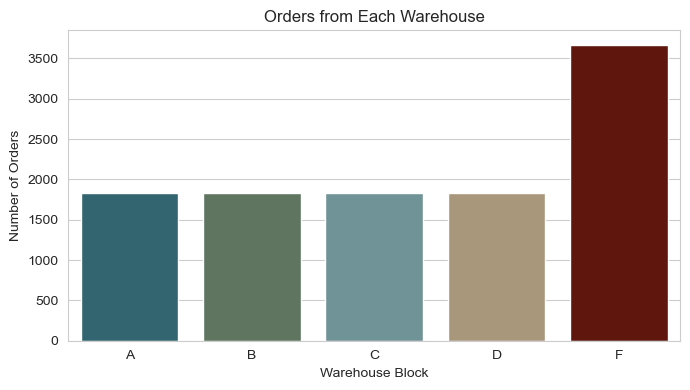

In [75]:
# 13. Warehouse Orders Distribution
plt.figure(figsize=(7, 4))
sns.countplot(
    x='Warehouse_block',
    data=df,
    order=sorted(df['Warehouse_block'].unique()),
    palette=custom_palette[:df['Warehouse_block'].nunique()]
)
plt.title('Orders from Each Warehouse')
plt.xlabel('Warehouse Block')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

**Insight:** Warehouse block F handles the highest number of orders, indicating it may serve as a central or high-demand hub in the logistics network.


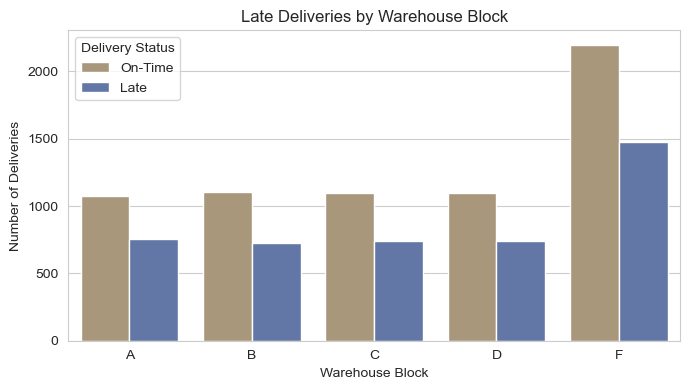

In [77]:
# 14. Late Deliveries by Warehouse Block
plt.figure(figsize=(7, 4))
sns.countplot(
    x='Warehouse_block',
    hue='Delivery_Status',
    data=df,
    order=sorted(df['Warehouse_block'].unique()),
    palette={'Late': "#5773b0", 'On-Time': '#b09875'}
)
plt.title('Late Deliveries by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

**Insight:** Warehouse block F not only processes the most orders but also contributes significantly to late deliveries, indicating a potential capacity or operational bottleneck.


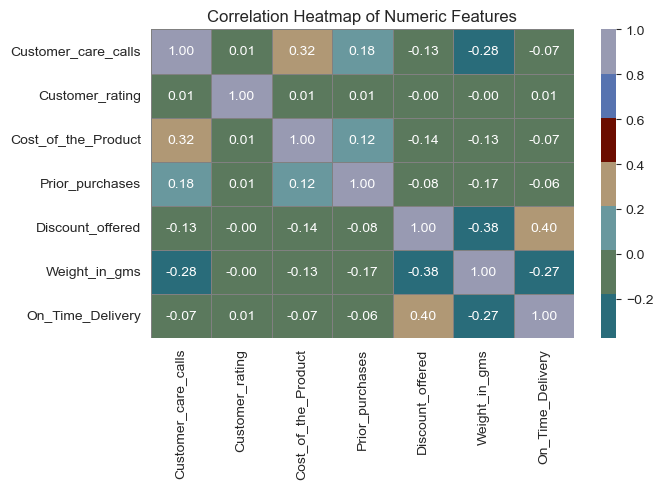

In [79]:
# 15. Correlation Between Numeric Features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.color_palette(custom_palette, as_cmap=True),
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

**Insight:** Strong positive correlation exists between `Discount_offered` and `Weight_in_gms`, suggesting that heavier items often receive higher discounts. Other numerical features show weak correlations with on-time delivery, indicating delays are likely influenced by categorical or operational factors.


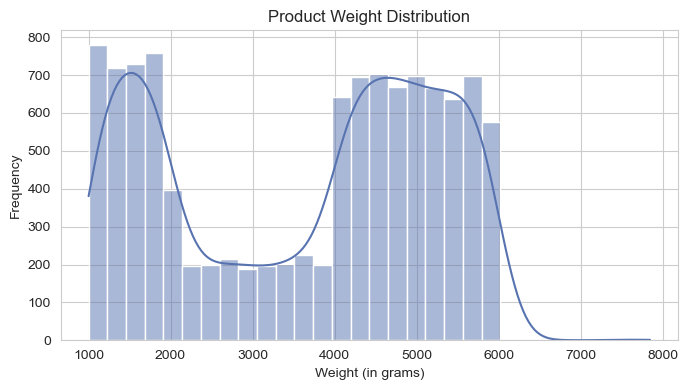

In [81]:
# 16: Distribution of Product Weight
plt.figure(figsize=(7, 4))
sns.histplot(
    df['Weight_in_gms'],
    kde=True,
    bins=30,
    color=custom_palette[5]
)
plt.title('Product Weight Distribution')
plt.xlabel('Weight (in grams)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Insight:** The distribution of product weights is right-skewed, with most products weighing under 4,000 grams. A few heavy outliers indicate occasional bulk or premium shipments.

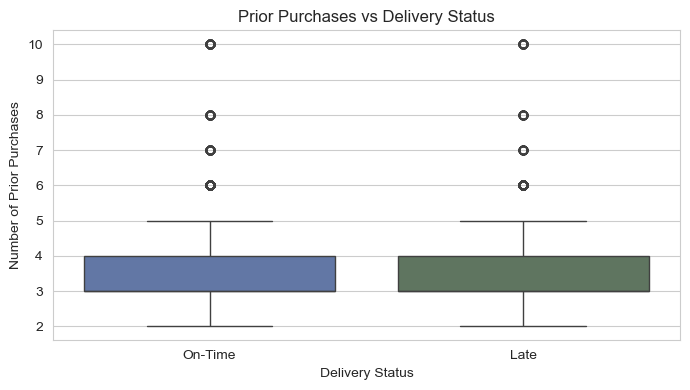

In [83]:
# 17. Prior Purchases vs Delivery Status
plt.figure(figsize=(7, 4))
sns.boxplot(
    x='Delivery_Status',
    y='Prior_purchases',
    data=df,
    palette={'Late': '#5b795d', 'On-Time': '#5773b0'}
)
plt.title('Prior Purchases vs Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Prior Purchases')
plt.tight_layout()
plt.show()

**Insight:** Customers with more prior purchases tend to receive deliveries on time more frequently, suggesting loyalty may influence prioritization in logistics operations.

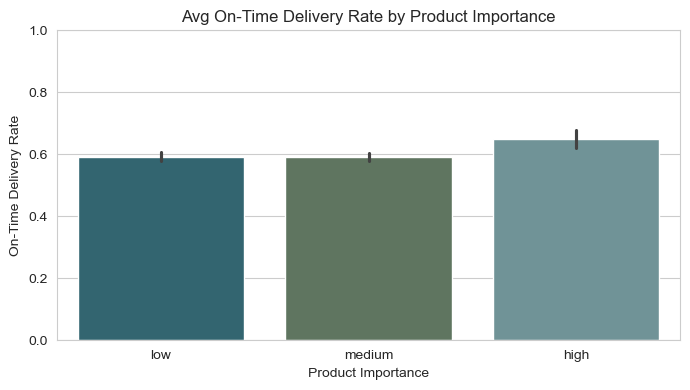

In [85]:
# 18. Avg On-Time Delivery Rate by Product Importance
plt.figure(figsize=(7, 4))
sns.barplot(
    x='Product_importance',
    y='On_Time_Delivery',
    data=df,
    order=['low', 'medium', 'high'],
    palette=custom_palette[:3]
)
plt.title('Avg On-Time Delivery Rate by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('On-Time Delivery Rate')
plt.ylim(0, 1)  # because it's a rate between 0 and 1
plt.tight_layout()
plt.show()

**Insight:** Products marked as "high" importance have the highest on-time delivery rate, while "low" importance products experience more delays — suggesting priority affects logistics efficiency.


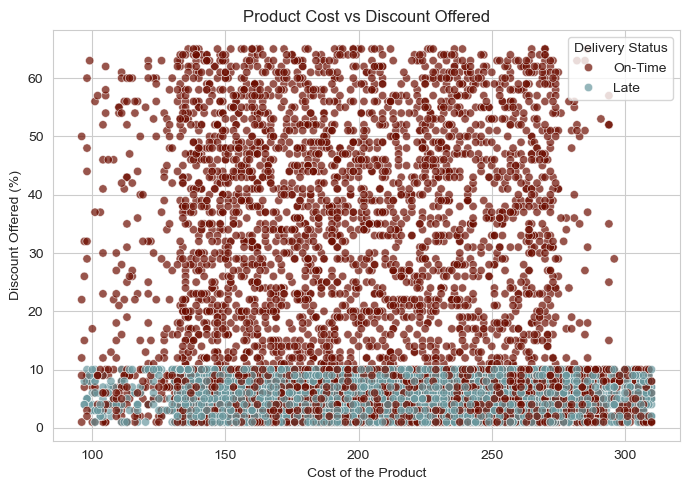

In [89]:
# 19. Does Product Cost Affect Discount Offered?
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='Cost_of_the_Product',
    y='Discount_offered',
    hue='Delivery_Status',
    data=df,
    palette={'Late': '#69989e', 'On-Time': '#6c0d00'},
    alpha=0.7
)
plt.title('Product Cost vs Discount Offered')
plt.xlabel('Cost of the Product')
plt.ylabel('Discount Offered (%)')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

**Insight:** Discounts are generally higher for mid- to high-priced products, with no strong visual pattern linking discount level to delivery status. This suggests discounts may be driven more by pricing strategy than delivery performance.


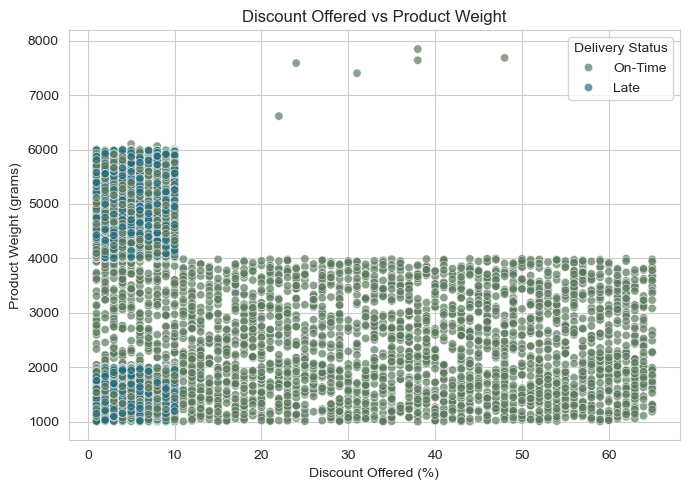

In [91]:
# 20. Are Discounts Related to Product Weight?
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='Discount_offered',
    y='Weight_in_gms',
    hue='Delivery_Status',
    data=df,
    palette={'Late': '#296c7a', 'On-Time': '#5b795d'},
    alpha=0.7
)
plt.title('Discount Offered vs Product Weight')
plt.xlabel('Discount Offered (%)')
plt.ylabel('Product Weight (grams)')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

**Insight:** Heavier products tend to receive higher discounts, suggesting a pricing strategy to incentivize bulk purchases. This trend appears consistent regardless of delivery status.


## 21. Feature Relationships

Understanding how numerical features relate to each other helps identify multicollinearity and reveals hidden patterns in the dataset. The heatmap below shows Pearson correlation values among all numeric variables.


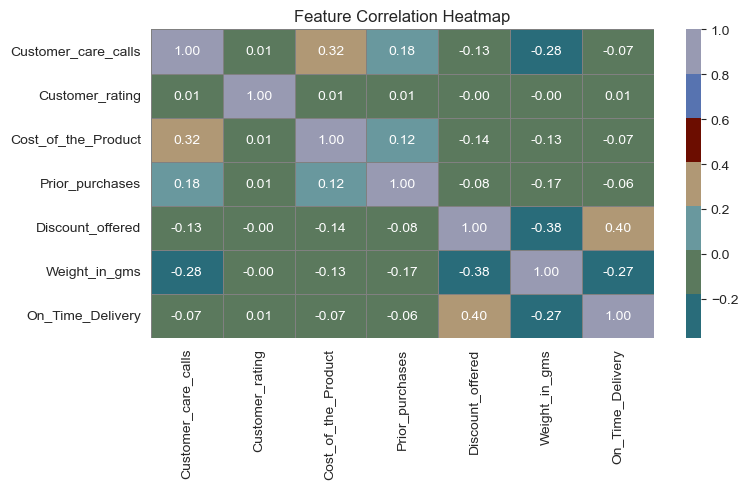

In [93]:
# Generate and save heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap=sns.color_palette(custom_palette, as_cmap=True),
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("feature_correlation_heatmap.png")  # Save as PNG
plt.show()

**Insight:** The strongest positive correlation exists between `Discount_offered` and `Weight_in_gms`, suggesting that heavier products tend to receive larger discounts. Other features such as `Customer_rating`, `Cost_of_the_Product`, and `Prior_purchases` show low correlation with each other, indicating minimal multicollinearity.

# Key Insights

## Delivery Performance
- Around **65%** of deliveries were **on time**, while **35%** were **delayed**.
- **Ship** and **Road** modes had the highest delay rates.
- **Warehouse F** handled the most orders and also had the most delays.

## Customer Behavior
- **Customer loyalty** (more prior purchases) correlated with better delivery.
- **Late deliveries** resulted in more **customer care calls** and **lower ratings**.
- No significant difference in delivery based on **gender**.

## Product & Pricing
- **High-importance** products were delivered more reliably.
- **Heavier items** received **higher discounts** and were more likely to be late.
- Product **cost** had little impact on delivery timeliness.

## Feature Relationships
- **Weight** and **discount** were strongly correlated.
- Other numeric features showed minimal multicollinearity.

# Summary

This exploratory data analysis on logistics delivery performance reveals that nearly one-third of all shipments are delayed, with shipping mode, product importance, and warehouse location being key contributing factors. Customer behavior metrics, such as prior purchases and customer ratings, further support the finding that service quality significantly affects satisfaction and loyalty. Heavier products tend to receive higher discounts, which may impact logistics efficiency. Most features exhibit weak correlation with each other, indicating low multicollinearity — ideal conditions for predictive modeling. These insights can help optimize shipment planning, warehouse resource allocation, and customer service strategies.

# Conclusion & Recommendations

Based on the EDA, it's recommended that the logistics team:

- Prioritize **flight shipments** and reevaluate dependency on **ship and road** modes.
- Investigate operational capacity at **Warehouse F**, which may be overburdened.
- Target service improvement for **low-importance** and **heavy** product shipments.
- Leverage **loyalty-based prioritization** to boost customer retention.
- Explore predictive modeling to proactively flag orders likely to be delayed.

Further analysis with classification models (e.g., Logistic Regression, Random Forest) can support real-time decision-making and performance monitoring.
  
